In [12]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [13]:
!pip install prophet awswrangler

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
import awswrangler as wr
path = f"s3://source-voltar/source/apple_daily_close.csv"
df=wr.s3.read_csv(path)
df.tail()

,date,open,high,low,close,adjclose,volume,ticker
1816,2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400,AAPL
1817,2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700,AAPL
1818,2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400,AAPL
1819,2022-09-29,146.100006,146.720001,140.679993,142.479996,142.479996,128138200,AAPL
1820,2022-09-30,141.279999,143.100006,138.000000,138.199997,138.199997,124705400,AAPL


In [17]:
df.describe()

,open,high,low,close,adjclose,volume
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1.821000e+03
mean,73.561753,74.398664,72.761039,73.614219,72.130397,1.281692e+08
std,48.519249,49.149154,47.896148,48.542617,49.053098,6.473197e+07
min,22.500000,22.917500,22.367500,22.584999,20.949610,4.100000e+07
25%,35.980000,36.187500,35.794998,35.950001,33.921047,8.605600e+07
50%,49.799999,50.247501,49.537498,49.875000,48.499195,1.097448e+08
75%,122.019997,123.599998,120.320000,121.779999,120.535080,1.500468e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,6.488252e+08


In [18]:
# Select only the important features i.e. the date and price
data = df[["date","close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = df.rename(columns = {"date":"ds","close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,open,high,low,y,adjclose,volume,ticker
0,2015-07-10,30.485001,30.962500,30.3025,30.820000,28.014683,245418000,AAPL
1,2015-07-13,31.257500,31.440001,31.0800,31.415001,28.555525,165762000,AAPL
2,2015-07-14,31.510000,31.592501,31.2600,31.402500,28.544165,127072400,AAPL
3,2015-07-15,31.430000,31.787500,31.3950,31.705000,28.819128,134596800,AAPL
4,2015-07-16,31.934999,32.142502,31.8375,32.127499,29.203169,144889600,AAPL


In [19]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:36 - cmdstanpy - INFO - Chain [1] done processing


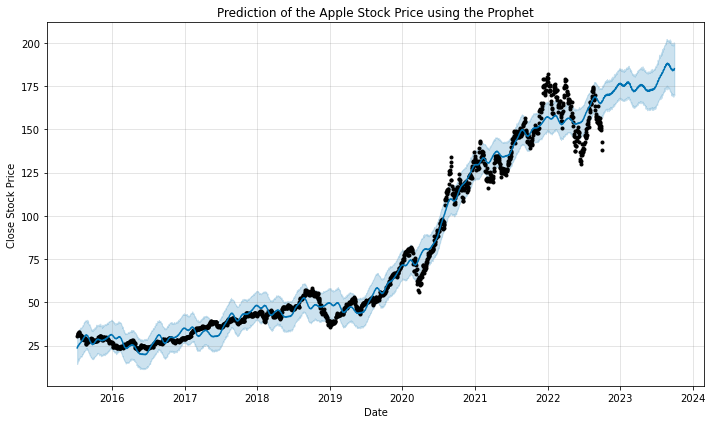

In [20]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Prediction of the Apple Stock Price using the Prophet")
plt.xlabel("Date",)
plt.ylabel("Close Stock Price", )
plt.tight_layout()
plt.savefig('plots/Stock-Prophet-Plot.jpg',bbox_inches='tight')
plt.show()

# fig = model.plot(forecast, xlabel='Date', ylabel='Value')
# ax = fig.gca()
# ax.set_title("Title", size=34)
# ax.set_xlabel("X", size=34)
# ax.set_ylabel("Y", size=34)
# ax.tick_params(axis="x", labelsize=24)
# ax.tick_params(axis="y", labelsize=24)

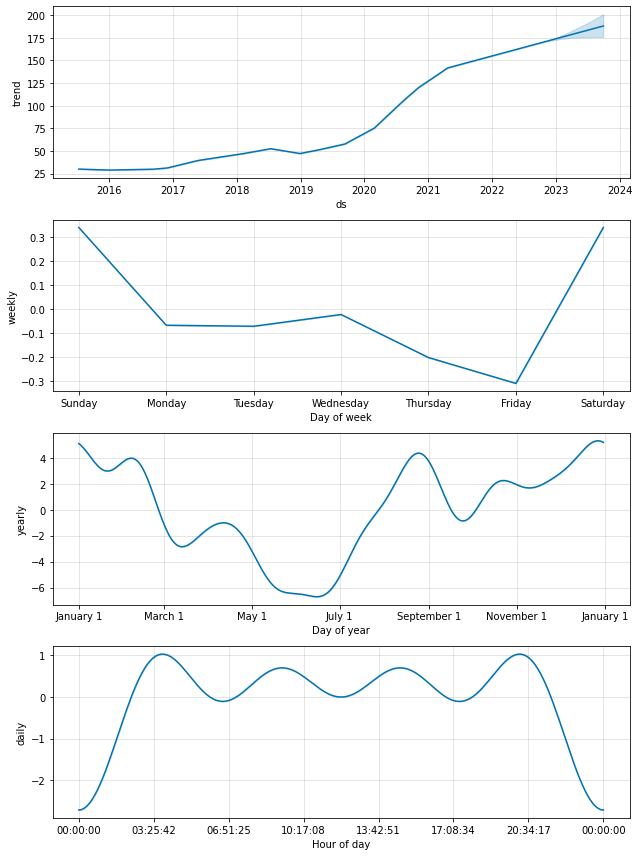

In [21]:
m.plot_components(prediction)
plt.rcParams["figure.figsize"] = (10,8)
# plt.tight_layout()
plt.savefig('plots/Stock-Prophet-Seasonal-Plot.jpg')
plt.show()